# Operational Pipeline (**DDO**)

### Before running this script,
- Train a base proxy model with uniform weights (or reference weights, if available);
- At each time, add/reduce data quantity for one domain and re-train the proxy model;

### In this script,
- Enter the results for the experiments listed above;
- Fit power law scaling functions and solve the optimization problem.

In [ ]:
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
import numpy as np
import pandas as pd

## Enter the results for the experiments listed above

- Row #0: Validation perplexity (PPL) for the base proxy model with uniform weights;
- Row #1-7: Validation perplexity (PPL) for the model with 3x domain data for each of the 7 domains;
- Row #8-14: Validation perplexity (PPL) for the model with 1/3 domain data for each of the 7 domains;
---
- Column #0-6: Validation perplexity (PPL) for each of the 7 domains;
- Column #7: Validation perplexity (PPL) aggregated over all 7 domains.

In [2]:
resmat = np.array([[38.43918768,6.810644431,39.42194489,26.29195806,52.70910489,17.20930668,15.91400852,28.11373645],
[47.00076314,6.701936791,40.35301934,27.46806525,55.96132476,17.38722599,15.90832213,30.11152249],
[38.47780852,8.733341311,39.32540073,26.33351201,52.60689674,17.44232836,15.71886359,28.37687875],
[39.40428505,6.776319454,49.33124143,26.52060831,54.00225121,17.18970718,15.79250617,29.85955983],
[40.54155441,6.839139826,39.94417608,34.18524889,54.4167876,17.46952505,15.91726493,29.90195668],
[41.14448824,6.859714282,40.67308865,27.20368327,63.08622503,17.60106561,16.07101523,30.37704005],
[39.0137341,6.926247482,39.88225296,26.52126904,53.86754481,22.27269354,16.17991942,29.23766591],
[38.70249171,6.918485731,39.86103863,26.26226702,53.17299166,17.6842962,19.8770841,28.92552215],
[30.19684821,6.939812039,37.90792361,24.23158181,48.17830869,17.36539446,15.68351383,25.78619752],
[37.94802952,5.613374945,39.16422994,25.89138817,52.30460075,17.11699951,15.72370227,27.68033216],
[36.59637765,6.914859328,31.6888879,25.64599554,50.05357382,17.07781462,15.8308627,26.25833879],
[35.85588461,6.783658997,38.64062824,20.39439632,50.55149186,17.34583219,15.74445236,26.47376351],
[34.54990076,6.8295301,37.3943686,24.64569948,42.5830809,16.86745534,15.61577385,25.49797272],
[37.55289603,6.608311497,38.75894959,25.64544282,51.21980577,14.05161784,15.26695558,27.01485416],
[37.54411654,6.694165841,39.11963037,25.60502117,51.65007665,16.98920334,13.09181378,27.24200395]])
resmat.shape

(15, 8)

In [3]:
almat=resmat
admat = almat[8:,:]-almat[0,:]
admat.shape

(7, 8)

## Visualize perplexity change from the base proxy model with uniform weights

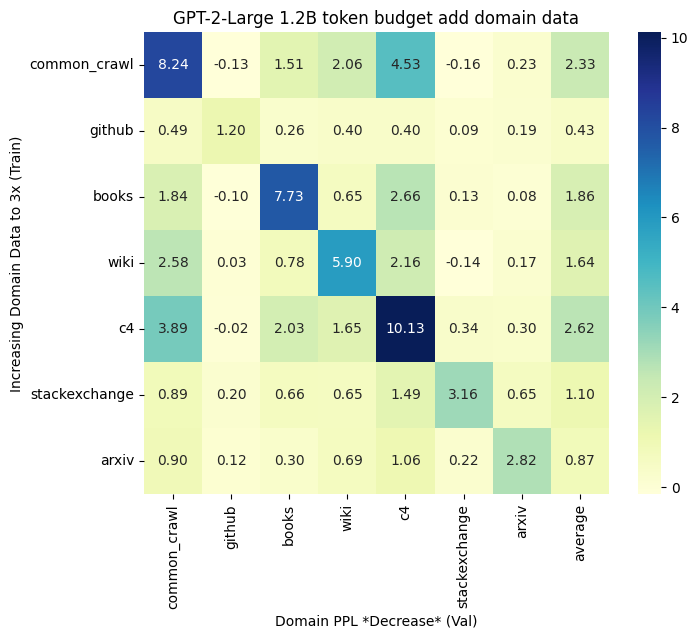

In [67]:
data = -admat

y_axis_labels = ['common_crawl','github','books','wiki','c4','stackexchange','arxiv'] 
x_axis_labels = ['common_crawl','github','books','wiki','c4','stackexchange','arxiv', 'average']  
df = pd.DataFrame(data, columns=x_axis_labels, index=y_axis_labels)
plt.figure(figsize=(7.5, 6))
ax = sns.heatmap(df, annot=True, fmt=".2f", cmap='YlGnBu')
ax.set_ylabel("Increasing Domain Data to 3x (Train)")
ax.set_xlabel("Domain PPL *Decrease* (Val)")
ax.set_title("GPT-2-Large 1.2B token budget add domain data")
plt.show()

In [68]:
rdmat = almat[1:8,:]-almat[0,:]
rdmat

array([[ 8.56157546e+00, -1.08707640e-01,  9.31074450e-01,
         1.17610719e+00,  3.25221987e+00,  1.77919310e-01,
        -5.68639000e-03,  1.99778604e+00],
       [ 3.86208400e-02,  1.92269688e+00, -9.65441600e-02,
         4.15539500e-02, -1.02208150e-01,  2.33021680e-01,
        -1.95144930e-01,  2.63142300e-01],
       [ 9.65097370e-01, -3.43249770e-02,  9.90929654e+00,
         2.28650250e-01,  1.29314632e+00, -1.95995000e-02,
        -1.21502350e-01,  1.74582338e+00],
       [ 2.10236673e+00,  2.84953950e-02,  5.22231190e-01,
         7.89329083e+00,  1.70768271e+00,  2.60218370e-01,
         3.25641000e-03,  1.78822023e+00],
       [ 2.70530056e+00,  4.90698510e-02,  1.25114376e+00,
         9.11725210e-01,  1.03771201e+01,  3.91758930e-01,
         1.57006710e-01,  2.26330360e+00],
       [ 5.74546420e-01,  1.15603051e-01,  4.60308070e-01,
         2.29310980e-01,  1.15843992e+00,  5.06338686e+00,
         2.65910900e-01,  1.12392946e+00],
       [ 2.63304030e-01,  1.078413

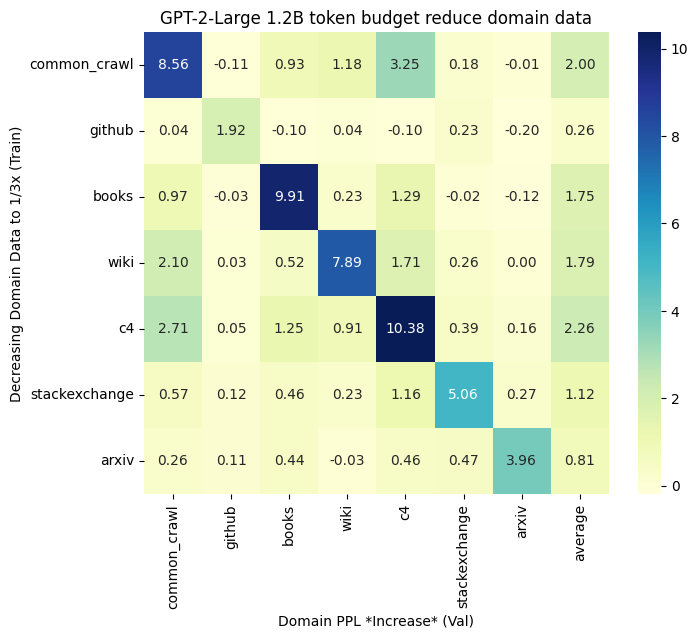

In [69]:
data = rdmat

y_axis_labels = ['common_crawl','github','books','wiki','c4','stackexchange','arxiv'] 
x_axis_labels = ['common_crawl','github','books','wiki','c4','stackexchange','arxiv', 'average']  
df = pd.DataFrame(data, columns=x_axis_labels, index=y_axis_labels)
plt.figure(figsize=(7.5, 6))
ax = sns.heatmap(df, annot=True, fmt=".2f", cmap='YlGnBu')
ax.set_ylabel("Decreasing Domain Data to 1/3x (Train)")
ax.set_xlabel("Domain PPL *Increase* (Val)")
ax.set_title("GPT-2-Large 1.2B token budget reduce domain data")
plt.show()

In [70]:
domainLst = ['', 'common_crawl','github','books','wiki','c4','stackexchange','arxiv'] 

## (example) Fit power law function for PPL of one domain

Optimal parameters: a = 2.6658731959247985, b = 1.2492023890295736, c = 0.8026540600177617


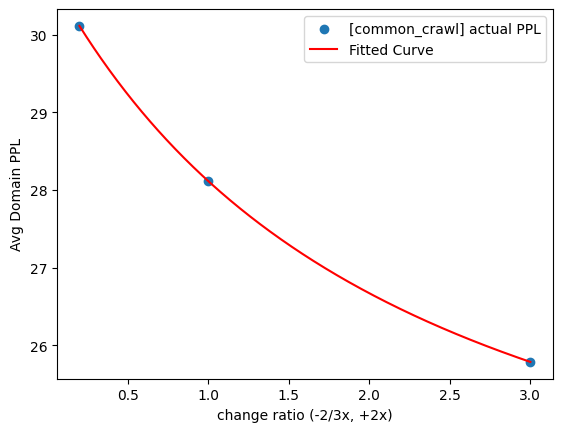

In [23]:
dom = 1

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Your data
x = np.array([1/5, 1, 3])
y = np.array([almat[dom, -1], almat[0, -1], almat[dom+7, -1]])/almat[0, -1]

# Define the model function
def model(x, a, b, c):
    return np.power(x+a,-b) + c

# Use curve_fit to fit the model to the data
popt, pcov = curve_fit(model, x, y, maxfev = 1000)

# Extract the optimal values of a and b
a_opt, b_opt, c_opt = popt
print(f"Optimal parameters: a = {a_opt}, b = {b_opt}, c = {c_opt}")

# Use the optimal parameters to plot the fitted curve


x_range = np.linspace(np.min(x), np.max(x), 500)  # 500 points from min to max of x
y_fitted = model(x_range, a_opt, b_opt, c_opt)

# Plotting the data and the fitted curve
plt.scatter(x, y*almat[0, -1], label='['+domainLst[dom] + '] actual PPL')
plt.plot(x_range, y_fitted*almat[0, -1], color='red', label='Fitted Curve')
# plt.title('Data and Exponential Fit')
plt.xlabel('change ratio (-2/3x, +2x)')
plt.ylabel('Avg Domain PPL')

plt.legend()
plt.show()

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Choose a Seaborn color palette

custom_palette = sns.color_palette("husl", 8)

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_palette)


## Fit power law functions for PPL of all 7 domains

/home/fyk/anaconda3/envs/p39h/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Optimal parameters: a = 2.6658731959247985, b = 1.2492023890295736, c = 0.8026540600177617
Optimal parameters: a = 6.616175591939301, b = 1.4360012483967404, c = 0.9458217913242287
Optimal parameters: a = 2.673602759483928, b = 1.5362602612056064, c = 0.8645212064449814
Optimal parameters: a = 2.4631072679557477, b = 1.8287307258995613, c = 0.8968517051583392
Optimal parameters: a = 2.518384099486731, b = 1.1858721474138574, c = 0.775039246658818
Optimal parameters: a = 2.889957893044303, b = 1.9536275987550742, c = 0.9296170669705276
Optimal parameters: a = 3.31917392337233, b = 1.926671000555819, c = 0.9403250708425615


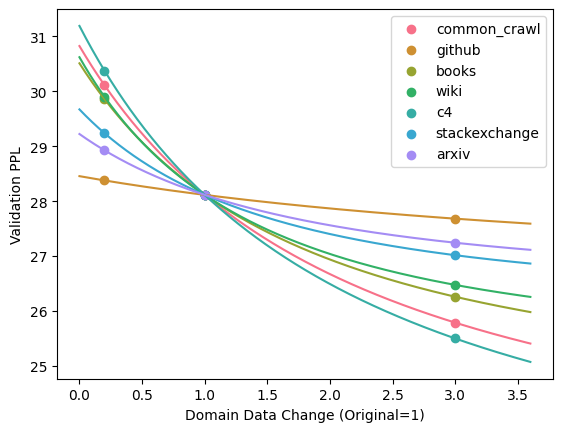

In [71]:
avec=[]
bvec=[]
cvec=[]

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Your data
x = np.array([1/5, 1, 3])

for dom in range(1,8):   
    y = np.array([almat[dom, -1], almat[0, -1], almat[dom+7, -1]])/almat[0, -1]

    # Define the model function
    def model(x, a, b, c):
        return np.power(x+a,-b) + c

    # Use curve_fit to fit the model to the data
    popt, pcov = curve_fit(model, x, y, maxfev = 10000)

    # Extract the optimal values of a and b
    a_opt, b_opt, c_opt = popt
    print(f"Optimal parameters: a = {a_opt}, b = {b_opt}, c = {c_opt}")

    # Use the optimal parameters to plot the fitted curve


    x_range = np.linspace(0*np.min(x), 1.2*np.max(x), 500)  # 500 points from min to max of x
    y_fitted = model(x_range, a_opt, b_opt, c_opt)
    
    avec.append(a_opt)
    bvec.append(b_opt)
    cvec.append(c_opt)

    # Plotting the data and the fitted curve
    plt.scatter(x, y*almat[0, -1], label=domainLst[dom])
    plt.plot(x_range, y_fitted*almat[0, -1])
    # plt.title('Data and Exponential Fit')
    plt.xlabel('Domain Data Change (Original=1)')
    plt.ylabel('Validation PPL')

    plt.legend()

plt.show()

## Optimize validation PPL over training domain weights with gradient descent (GD)

In [61]:
ind = range(7)
cn = len(ind)
nvec = np.ones(cn)+0.8*(7-cn)/cn
gvec = np.ones(cn)


for t in range(1000):

    for i in range(cn):
        
        gvec[i] = (-bvec[ind[i]])*np.power(nvec[i]+avec[ind[i]],(-bvec[ind[i]]-1))

    # print(gvec)
    gvec = (cn/(cn-1))*gvec - np.sum(gvec)/(cn-1)
    nvec = nvec - gvec*0.1
    # print(gvec)
    print(t, nvec, np.sum(nvec))
    # print(np.sum(gvec[i]), gvec)

0 [1.00240603 0.99575212 1.00117019 1.00091502 1.00340638 0.99868429
 0.99766596] 7.0
1 [1.00480474 0.9915101  1.00233929 1.00182954 1.00679832 0.99737694
 0.99534108] 7.0
2 [1.00719615 0.98727392 1.00350728 1.00274353 1.01017591 0.9960779
 0.99302531] 7.0
3 [1.0095803  0.98304355 1.00467414 1.00365698 1.01353927 0.99478714
 0.99071864] 7.0
4 [1.01195721 0.97881896 1.00583986 1.00456986 1.0168885  0.99350459
 0.98842102] 7.0
5 [1.01432693 0.97460013 1.00700442 1.00548217 1.02022371 0.99223023
 0.98613241] 7.000000000000001
6 [1.01668949 0.97038704 1.00816781 1.00639387 1.02354501 0.99096399
 0.98385279] 7.0
7 [1.01904491 0.96617966 1.00933001 1.00730496 1.0268525  0.98970584
 0.98158212] 7.0
8 [1.02139323 0.96197797 1.01049102 1.00821542 1.03014628 0.98845572
 0.97932036] 7.0
9 [1.02373449 0.95778194 1.01165081 1.00912522 1.03342645 0.9872136
 0.97706748] 7.0
10 [1.02606871 0.95359155 1.01280938 1.01003436 1.03669312 0.98597943
 0.97482345] 7.0
11 [1.02839592 0.94940678 1.01396671 1.01

### Obtaining negative weights for the GitHub domain (violating constraints); Change to projected gradient descent.

Fix GitHub domain weight at the boundary (0.2x than original weights) and optimize over the remaining domains.

In [62]:
ind = [0,2,3,4,5,6]
cn = len(ind)
nvec = np.ones(cn)+0.8*(7-cn)/cn
gvec = np.ones(cn)


for t in range(10000):

    for i in range(cn):
        
        gvec[i] = (-bvec[ind[i]])*np.power(nvec[i]+avec[ind[i]],(-bvec[ind[i]]-1))

    # print(gvec)
    gvec = (cn/(cn-1))*gvec - np.sum(gvec)/(cn-1)
    nvec = nvec - gvec*0.1
    # print(gvec)
    print(t, nvec, np.sum(nvec))
    # print(np.sum(gvec[i]), gvec)

0 [1.13499977 1.13376392 1.13342677 1.13594128 1.13139286 1.13047539] 6.799999999999999
1 [1.13666081 1.13419467 1.13352172 1.13853809 1.12945981 1.12762489] 6.8
2 [1.13831647 1.13462557 1.13361816 1.14112383 1.12753416 1.12478181] 6.8
3 [1.13996677 1.1350566  1.13371607 1.14369857 1.12561586 1.12194613] 6.8
4 [1.14161172 1.13548773 1.13381541 1.14626238 1.1237049  1.11911785] 6.8
5 [1.14325135 1.13591897 1.13391618 1.14881532 1.12180126 1.11629693] 6.799999999999999
6 [1.14488566 1.13635028 1.13401834 1.15135746 1.11990489 1.11348337] 6.799999999999999
7 [1.14651467 1.13678166 1.13412187 1.15388887 1.11801578 1.11067715] 6.799999999999999
8 [1.14813841 1.13721308 1.13422675 1.1564096  1.1161339  1.10787825] 6.799999999999999
9 [1.14975688 1.13764454 1.13433296 1.15891973 1.11425923 1.10508666] 6.799999999999999
10 [1.15137011 1.13807602 1.13444048 1.16141932 1.11239173 1.10230235] 6.8
11 [1.15297812 1.1385075  1.13454928 1.16390842 1.11053138 1.09952531] 6.8
12 [1.15458091 1.13893897 

1132 [1.61696329 1.2769312  1.18316681 1.83604789 0.64354159 0.24334922] 6.8
1133 [1.61699286 1.27692747 1.18315838 1.83609943 0.64351782 0.24330403] 6.8
1134 [1.61702233 1.27692374 1.18314997 1.8361508  0.64349413 0.24325903] 6.8
1135 [1.61705168 1.27691999 1.18314157 1.83620201 0.64347054 0.24321421] 6.799999999999999
1136 [1.61708092 1.27691623 1.18313318 1.83625304 0.64344704 0.24316958] 6.799999999999999
1137 [1.61711005 1.27691247 1.18312481 1.83630391 0.64342362 0.24312513] 6.8
1138 [1.61713907 1.2769087  1.18311646 1.83635461 0.6434003  0.24308087] 6.799999999999999
1139 [1.61716799 1.27690491 1.18310812 1.83640514 0.64337706 0.24303678] 6.8
1140 [1.61719679 1.27690112 1.18309979 1.8364555  0.6433539  0.24299288] 6.799999999999999
1141 [1.61722549 1.27689733 1.18309148 1.8365057  0.64333084 0.24294916] 6.799999999999998
1142 [1.61725408 1.27689352 1.18308318 1.83655573 0.64330786 0.24290562] 6.799999999999998
1143 [1.61728257 1.27688971 1.1830749  1.8366056  0.64328497 0.242862

2356 [1.62469984 1.27428213 1.17987599 1.85157529 0.63723779 0.23232896] 6.799999999999996
2357 [1.62470009 1.27428174 1.17987572 1.8515763  0.63723753 0.23232861] 6.799999999999997
2358 [1.62470034 1.27428136 1.17987546 1.85157731 0.63723727 0.23232827] 6.799999999999996
2359 [1.62470058 1.27428098 1.1798752  1.85157831 0.63723701 0.23232792] 6.799999999999996
2360 [1.62470083 1.27428059 1.17987494 1.85157931 0.63723675 0.23232758] 6.799999999999997
2361 [1.62470107 1.27428021 1.17987468 1.8515803  0.63723649 0.23232724] 6.799999999999996
2362 [1.62470132 1.27427983 1.17987442 1.8515813  0.63723624 0.2323269 ] 6.799999999999997
2363 [1.62470156 1.27427945 1.17987416 1.85158229 0.63723598 0.23232656] 6.799999999999997
2364 [1.6247018  1.27427908 1.1798739  1.85158327 0.63723572 0.23232622] 6.799999999999997
2365 [1.62470204 1.2742787  1.17987365 1.85158426 0.63723547 0.23232589] 6.799999999999996
2366 [1.62470228 1.27427832 1.17987339 1.85158524 0.63723522 0.23232555] 6.799999999999996

3584 [1.6247544  1.27415465 1.17979709 1.85189233 0.63716483 0.2322367 ] 6.799999999999986
3585 [1.6247544  1.27415464 1.17979709 1.85189236 0.63716483 0.23223669] 6.799999999999985
3586 [1.62475439 1.27415463 1.17979708 1.85189238 0.63716483 0.23223669] 6.799999999999986
3587 [1.62475439 1.27415462 1.17979708 1.8518924  0.63716482 0.23223668] 6.799999999999986
3588 [1.62475439 1.27415461 1.17979708 1.85189242 0.63716482 0.23223668] 6.799999999999985
3589 [1.62475439 1.2741546  1.17979707 1.85189245 0.63716482 0.23223668] 6.799999999999986
3590 [1.62475439 1.27415459 1.17979707 1.85189247 0.63716481 0.23223667] 6.799999999999985
3591 [1.62475439 1.27415458 1.17979706 1.85189249 0.63716481 0.23223667] 6.799999999999985
3592 [1.62475439 1.27415457 1.17979706 1.85189251 0.63716481 0.23223666] 6.799999999999985
3593 [1.62475439 1.27415456 1.17979705 1.85189254 0.6371648  0.23223666] 6.799999999999986
3594 [1.62475439 1.27415455 1.17979705 1.85189256 0.6371648  0.23223666] 6.799999999999985

4814 [1.62475358 1.27415172 1.17979576 1.85189962 0.63716378 0.23223553] 6.799999999999983
4815 [1.62475358 1.27415172 1.17979576 1.85189962 0.63716378 0.23223553] 6.799999999999981
4816 [1.62475358 1.27415172 1.17979576 1.85189962 0.63716378 0.23223553] 6.799999999999982
4817 [1.62475358 1.27415172 1.17979576 1.85189962 0.63716378 0.23223553] 6.799999999999981
4818 [1.62475358 1.27415172 1.17979576 1.85189962 0.63716378 0.23223553] 6.799999999999981
4819 [1.62475358 1.27415172 1.17979576 1.85189962 0.63716378 0.23223553] 6.799999999999981
4820 [1.62475358 1.27415172 1.17979576 1.85189962 0.63716378 0.23223553] 6.799999999999981
4821 [1.62475358 1.27415172 1.17979576 1.85189962 0.63716378 0.23223553] 6.799999999999982
4822 [1.62475358 1.27415172 1.17979576 1.85189962 0.63716378 0.23223553] 6.799999999999982
4823 [1.62475358 1.27415172 1.17979576 1.85189963 0.63716378 0.23223553] 6.799999999999982
4824 [1.62475358 1.27415172 1.17979576 1.85189963 0.63716378 0.23223553] 6.799999999999981

6048 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999974
6049 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999975
6050 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999975
6051 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999976
6052 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999975
6053 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999975
6054 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999976
6055 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999976
6056 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999975
6057 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999977
6058 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999976

7275 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.79999999999997
7276 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.7999999999999705
7277 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.79999999999997
7278 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.79999999999997
7279 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999969
7280 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999969
7281 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.79999999999997
7282 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999969
7283 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999969
7284 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999969
7285 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.79999999999997
728

8491 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999969
8492 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999968
8493 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999969
8494 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999969
8495 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999969
8496 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999969
8497 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999968
8498 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999969
8499 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999969
8500 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999968
8501 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.799999999999969

9718 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.800000000000093
9719 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.800000000000093
9720 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.800000000000093
9721 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.800000000000092
9722 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.800000000000091
9723 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.800000000000092
9724 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.800000000000092
9725 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.800000000000092
9726 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.800000000000093
9727 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.800000000000093
9728 [1.62475352 1.27415166 1.17979573 1.8518998  0.63716376 0.23223551] 6.800000000000093

In [63]:
nvec

array([1.62475352, 1.27415166, 1.17979573, 1.8518998 , 0.63716376,
       0.23223551])

### Add back domain weights for GitHub (0.2x) and visualize DDO optimization results

In [64]:
nvec = np.array([1.62400123, 0.2,1.27295996, 1.17864697, 1.85235172, 0.63745544,
       0.23458466])

In [65]:
neww = nvec
np.sum(neww)

6.99999998

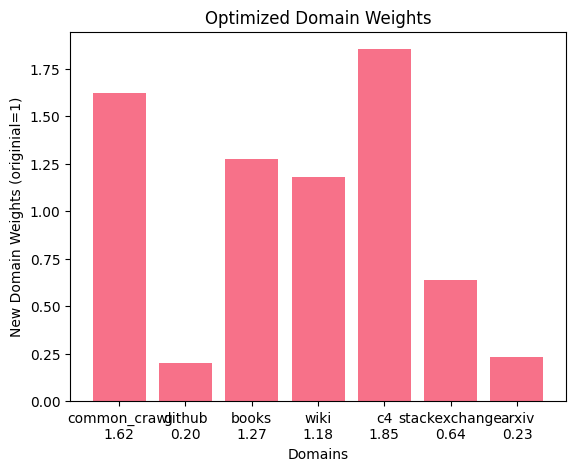

In [66]:
import matplotlib.pyplot as plt
# Sample data 'amazon','arxiv', 'books', 'wiki', 'owtc'
categories = ['common_crawl\n'+ "{:.2f}".format(neww[0]), 'github\n'+ "{:.2f}".format(neww[1]), 'books\n'+ "{:.2f}".format(neww[2]), 'wiki\n'+ "{:.2f}".format(neww[3]), 'c4\n'+ "{:.2f}".format(neww[4]), 'stackexchange\n'+ "{:.2f}".format(neww[5]), 'arxiv\n'+ "{:.2f}".format(neww[6])]
# values = [23, 45, 56]
# Creating bar plot
plt.bar(categories, neww)
plt.xlabel('Domains')
plt.ylabel('New Domain Weights (originial=1)')
plt.title('Optimized Domain Weights')
plt.show()